# Modelos de regresión lineal

## Modelo con datos simulados
* y = a + b * x
* x = 100 valores normalmente distribuidos entre N(1.5, 2.5)
* y = 5 + 1.9 * x + e
* e estará distribuido según una N(0, 0.8)

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
x = 1.5 + 2.5 * np.random.randn(100)
e = 0 + 0.8 * np.random.randn(100)

In [47]:
y_pred = 5 + 1.9 * x            # Predicción, lo que regresa el modelo lineal
y_actual = 5 + 1.9 * x + e        # Predicción, lo que realmente observamos

In [48]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_actual_list = y_actual.tolist()

In [49]:
data = pd.DataFrame({
    'x': x_list,
    'y_actual': y_actual_list,
    'y_pred': y_pred_list
})

In [50]:
data

,x,y_actual,y_pred
0,-0.609765,3.454044,3.841447
1,-0.760583,2.319686,3.554892
2,1.357624,7.627736,7.579486
3,-0.086506,4.375426,4.835639
4,0.935723,6.253043,6.777874
...,...,...,...
95,3.711596,12.732072,12.052032
96,-5.163192,-4.983237,-4.810066
97,2.992808,10.708705,10.686335
98,5.340792,13.996415,15.147505


In [52]:
y_mean = [np.mean(y_actual) for i in range(1, len(x_list) + 1)]

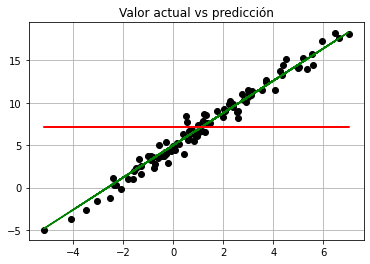

In [53]:
plt.plot(x, y_actual, 'ko')
plt.plot(x, y_pred, 'g')
plt.plot(x, y_mean, 'r')
plt.title('Valor actual vs predicción')
plt.grid()

In [54]:
data['SSR'] = (data['y_pred'] - np.mean(y_actual))**2
data['SSD'] = (data['y_pred'] - data['y_actual'])**2
data['SST'] = (data['y_actual'] - np.mean(y_actual))**2

In [55]:
data

,x,y_actual,y_pred,SSR,SSD,SST
0,-0.609765,3.454044,3.841447,11.209673,0.150081,13.953872
1,-0.760583,2.319686,3.554892,13.210611,1.525734,23.715403
2,1.357624,7.627736,7.579486,0.152064,0.002328,0.192023
3,-0.086506,4.375426,4.835639,5.540815,0.211795,7.919192
4,0.935723,6.253043,6.777874,0.169462,0.275448,0.877012
...,...,...,...,...,...,...
95,3.711596,12.732072,12.052032,23.643901,0.462456,30.719754
96,-5.163192,-4.983237,-4.810066,143.990343,0.029989,148.176318
97,2.992808,10.708705,10.686335,12.227630,0.000500,12.384578
98,5.340792,13.996415,15.147505,63.329340,1.325009,46.333653


In [60]:
SSR = sum(data['SSR'])
SSD = sum(data['SSD'])
SST = sum(data['SST'])

In [61]:
print('SSR: ' + str(SSR))
print('SSD: ' + str(SSD))
print('SST: ' + str(SST))

SSR: 2173.5981381230717
SSD: 60.31885999444575
SST: 2388.976392206223


In [62]:
print('SST = SSR + SSD = ' + str(SSR + SSD))

SST = SSR + SSD = 2233.9169981175173


In [63]:
R2 = SSR / SST
print('R2 = SSR / SST = ' + str(R2))

R2 = SSR / SST = 0.9098449633969596


(array([ 1.,  2.,  1., 10., 18., 20., 26., 11.,  7.,  4.]),
 array([-2.45866456, -2.02812732, -1.59759007, -1.16705283, -0.73651559,
        -0.30597835,  0.1245589 ,  0.55509614,  0.98563338,  1.41617062,
         1.84670787]),
 <a list of 10 Patch objects>)

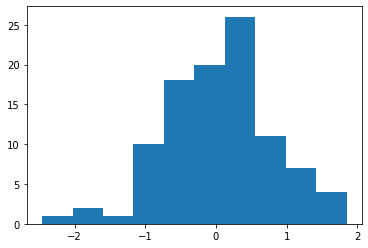

In [66]:
plt.hist(data['y_pred'] - data['y_actual'])

# Obteniendo la recta de regresión

* y = a + b * x
* b = sum((xi - xm) * (yi - ym)) / sum((xi - xm) ^2)
* a = ym - b * xm

In [68]:
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y_actual'])
x_mean, y_mean

(1.1816797796146015, 7.189532049411784)

In [81]:
data['Beta_num'] = (data['x'] - x_mean) * (data['y_actual'] - y_mean)    # Numerador de beta
data['Beta_den'] = (data['x'] - x_mean)**2                               # Denominador de beta
       
beta = sum(data['Beta_num']) / sum(data['Beta_den'])                     # Beta

alpha = y_mean - beta * x_mean                                   # Alpha

alpha, beta

(4.86392565316159, 1.9680512744397456)

Modelo lineal obtenido por regresión
* y = 4.86392565316159 + 1.9680512744397456 * x

In [87]:
data['Y model'] = alpha + beta * data['x']

In [88]:
data

,x,y_actual,y_pred,SSR,SSD,SST,Beta_num,Beta_den,Y model
0,-0.609765,3.454044,3.841447,11.209673,0.150081,13.953872,6.691920,3.209273,3.663878
1,-0.760583,2.319686,3.554892,13.210611,1.525734,23.715403,9.458523,3.772386,3.367059
2,1.357624,7.627736,7.579486,0.152064,0.002328,0.192023,0.077099,0.030956,7.535799
3,-0.086506,4.375426,4.835639,5.540815,0.211795,7.919192,3.568809,1.608295,4.693677
4,0.935723,6.253043,6.777874,0.169462,0.275448,0.877012,0.230336,0.060495,6.705477
...,...,...,...,...,...,...,...,...,...
95,3.711596,12.732072,12.052032,23.643901,0.462456,30.719754,14.022160,6.400474,12.168536
96,-5.163192,-4.983237,-4.810066,143.990343,0.029989,148.176318,77.234667,40.257403,-5.297502
97,2.992808,10.708705,10.686335,12.227630,0.000500,12.384578,6.373673,3.280185,10.753925
98,5.340792,13.996415,15.147505,63.329340,1.325009,46.333653,28.310591,17.298217,15.374879


In [92]:
SSR = sum((data['Y model'] - y_mean)**2)
SSD = sum((data['Y model'] - data['y_actual'])**2)
SST = sum((data['y_actual'] - y_mean)**2)

SSR, SSD, SST

(2331.7552657515967, 57.22112645462433, 2388.976392206223)

In [93]:
R2 = SSR / SST
R2

0.9760478476717878

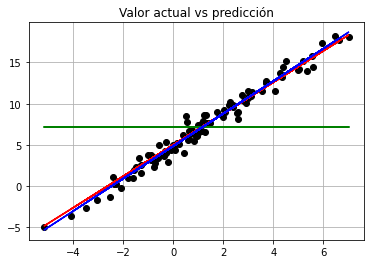

In [98]:
# Array de y promedio para que no dé error por tener diferentes dimensiones
y_mean = [np.mean(y_actual) for i in range(1, len(x_list) + 1)]

plt.plot(x, y_actual, 'ko')
plt.plot(x, y_pred, 'r')
plt.plot(x, y_mean, 'g')
plt.plot(data['x'], data['Y model'], 'b')
plt.title('Valor actual vs predicción')
plt.grid()

# Error estándar de los residuos (RSE)

In [108]:
RSE = np.sqrt(SSD / (len(data) - 2))
RSE  # Entre menor sea, mejor

0.7641263282045386

In [109]:
np.mean(data['y_actual'])

7.189532049411784

In [110]:
# Error
RSE / np.mean(data['y_actual']) * 100

10.628317990001257